# Task 5 - Ashish Tara Shivakumar Ireddy - J41325c

## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [35]:
import tensorflow
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
from keras import backend as K
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.python.client import device_lib

In [3]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Mounted at /content/drive/


In [ ]:
K._get_available_gpus()

['/device:GPU:0']

In [4]:
zip_train = '/content/drive/MyDrive/Colab Notebooks/train'
zip_val =   '/content/drive/MyDrive/Colab Notebooks/val'
zip_test =  '/content/drive/MyDrive/Colab Notebooks/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [5]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    zip_train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    zip_val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    zip_test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [6]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))
# 5:  +Convolutional
#     +Relu
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
#     +ReLu
model.add(Dense(64))
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
#     +Sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 10 Epochs

In [8]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

with tensorflow.device('/GPU:0'):
    model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
        validation_data=val_generator,
        validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
312/312 [==============================] - 2399s 8s/step - loss: 0.6011 - accuracy: 0.6644 - val_loss: 0.5176 - val_accuracy: 0.7492
Epoch 2/10
312/312 [==============================] - 116s 373ms/step - loss: 0.4978 - accuracy: 0.7601 - val_loss: 0.4941 - val_accuracy: 0.7607
Epoch 3/10
312/312 [==============================] - 114s 366ms/step - loss: 0.4234 - accuracy: 0.8066 - val_loss: 0.4159 - val_accuracy: 0.8043
Epoch 4/10
312/312 [==============================] - 116s 371ms/step - loss: 0.3729 - accuracy: 0.8369 - val_loss: 0.3948 - val_accuracy: 0.8166
Epoch 5/10
312/312 [==============================] - 117s 376ms/step - loss: 0.3233 - accuracy: 0.8591 - val_loss: 0.4149 - val_accuracy: 0.8224
Epoch 6/10
312/312 [==============================] - 114s 367ms/step - loss: 0.2771 - accuracy: 0.8819 - val_loss: 0.4060 - val_accuracy: 0.8380
Epoch 7/10
312/312 [==============================] - 117s 376ms/step - loss: 0.2437 - accuracy: 0.8976 - val_loss: 0.3843 - v

In [9]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on test data: 84.21%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

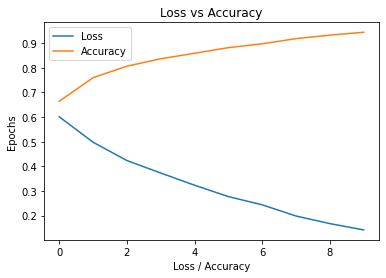

In [11]:
loss = [0.6011, 0.4978, 0.4234,  0.3729, 0.3233, 0.2771, 0.2437, 0.1983, 0.1674, 0.1418]
accuracy = [0.6644, 0.7601, 0.8066, 0.8369, 0.8591, 0.8819, 0.8976, 0.9185, 0.9327, 0.9445]
epochs = [i for i in range(10)]

plt.plot(epochs, loss, label = "Loss")
plt.plot(epochs, accuracy, label = "Accuracy")
plt.xlabel("Loss / Accuracy")
plt.ylabel("Epochs")
plt.title("Loss vs Accuracy")
plt.legend()

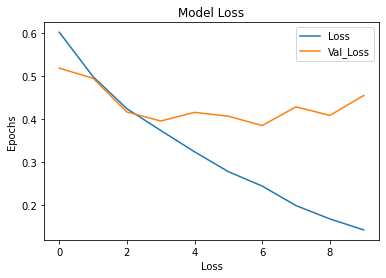

In [12]:
loss = [0.6011, 0.4978, 0.4234,  0.3729, 0.3233, 0.2771, 0.2437, 0.1983, 0.1674, 0.1418]
val_loss = [0.5176, 0.4941, 0.4159, 0.3948, 0.4149, 0.4060, 0.3843, 0.4278, 0.4078, 0.4541]
epochs = [i for i in range(10)]

plt.plot(epochs, loss, label = "Loss")
plt.plot(epochs, val_loss, label = "Val_Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("Model Loss")
plt.legend()

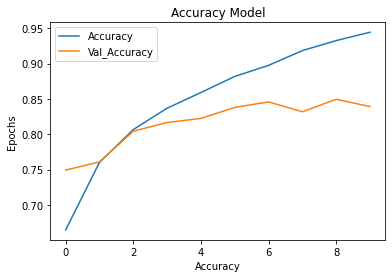

In [13]:
accuracy = [0.6644, 0.7601, 0.8066, 0.8369, 0.8591, 0.8819, 0.8976, 0.9185, 0.9327, 0.9445]
val_accuracy = [0.7492, 0.7607, 0.8043,  0.8166, 0.8224, 0.8380, 0.8458, 0.8318, 0.8495, 0.8392]
epochs = [i for i in range(10)]

plt.plot(epochs, accuracy, label = "Accuracy")
plt.plot(epochs, val_accuracy, label = "Val_Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.title("Accuracy Model")
plt.legend()

# 15 Epochs

In [14]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

with tensorflow.device('/GPU:0'):
    model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=15, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
        validation_data=val_generator,
        validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/15
312/312 [==============================] - 116s 373ms/step - loss: 0.1187 - accuracy: 0.9527 - val_loss: 0.5359 - val_accuracy: 0.8322
Epoch 2/15
312/312 [==============================] - 112s 358ms/step - loss: 0.1008 - accuracy: 0.9596 - val_loss: 0.5463 - val_accuracy: 0.8433
Epoch 3/15
312/312 [==============================] - 113s 363ms/step - loss: 0.0862 - accuracy: 0.9659 - val_loss: 0.6387 - val_accuracy: 0.8495
Epoch 4/15
312/312 [==============================] - 110s 351ms/step - loss: 0.0705 - accuracy: 0.9736 - val_loss: 0.7126 - val_accuracy: 0.8400
Epoch 5/15
312/312 [==============================] - 109s 349ms/step - loss: 0.0705 - accuracy: 0.9716 - val_loss: 0.5625 - val_accuracy: 0.8400
Epoch 6/15
312/312 [==============================] - 110s 352ms/step - loss: 0.0699 - accuracy: 0.9724 - val_loss: 0.7232 - val_accuracy: 0.8331
Epoch 7/15
312/312 [==============================] - 110s 353ms/step - loss: 0.0628 - accuracy: 0.9751 - val_loss: 0.6722 -

In [15]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores2 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on test data: 84.21%


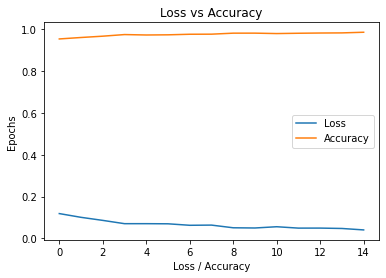

In [17]:
loss15 = [0.1187, 0.1008, 0.0862,  0.0705, 0.0705, 0.0699, 0.0628, 0.0637, 0.0509, 0.0499, 0.0559, 0.0493, 0.0494, 0.0476, 0.0407]
accuracy15 = [0.9527, 0.9596, 0.9659, 0.9736, 0.9716, 0.9724, 0.9751, 0.9755, 0.9803, 0.9804, 0.9784, 0.9799, 0.9810, 0.9816, 0.9847]
epochs = [i for i in range(15)]

plt.plot(epochs, loss15, label = "Loss")
plt.plot(epochs, accuracy15, label = "Accuracy")
plt.xlabel("Loss / Accuracy")
plt.ylabel("Epochs")
plt.title("Loss vs Accuracy")
plt.legend()

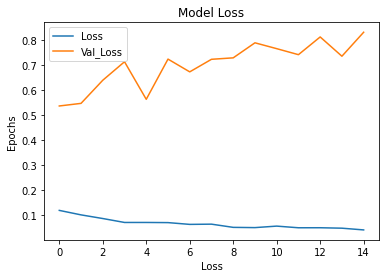

In [18]:
loss15 = [0.1187, 0.1008, 0.0862,  0.0705, 0.0705, 0.0699, 0.0628, 0.0637, 0.0509, 0.0499, 0.0559, 0.0493, 0.0494, 0.0476, 0.0407]
val_loss15 = [0.5359, 0.5463, 0.6387, 0.7126, 0.5625, 0.7232, 0.6722, 0.7224, 0.7282, 0.7883, 0.7649, 0.7409, 0.8117, 0.7347, 0.8305]
epochs = [i for i in range(15)]

plt.plot(epochs, loss15, label = "Loss")
plt.plot(epochs, val_loss15, label = "Val_Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("Model Loss")
plt.legend()

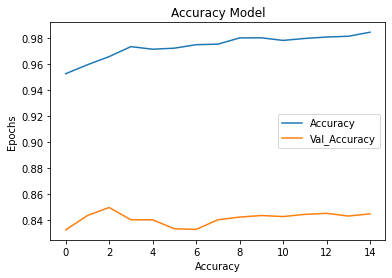

In [19]:
accuracy15 = [0.9527, 0.9596, 0.9659, 0.9736, 0.9716, 0.9724, 0.9751, 0.9755, 0.9803, 0.9804, 0.9784, 0.9799, 0.9810, 0.9816, 0.9847]
val_accuracy15 = [0.8322, 0.8433, 0.8495,  0.8400, 0.8400, 0.8331, 0.8326, 0.8400, 0.8421, 0.8433, 0.8425, 0.8442, 0.8450, 0.8429, 0.8446]
epochs = [i for i in range(15)]

plt.plot(epochs, accuracy15, label = "Accuracy")
plt.plot(epochs, val_accuracy15, label = "Val_Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.title("Accuracy Model")
plt.legend()

# 20 Epochs

In [16]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

with tensorflow.device('/GPU:0'):
    model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
        validation_data=val_generator,
        validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
312/312 [==============================] - 124s 399ms/step - loss: 0.0434 - accuracy: 0.9834 - val_loss: 0.9063 - val_accuracy: 0.8528
Epoch 2/20
312/312 [==============================] - 132s 424ms/step - loss: 0.0436 - accuracy: 0.9822 - val_loss: 0.8385 - val_accuracy: 0.8376
Epoch 3/20
312/312 [==============================] - 137s 438ms/step - loss: 0.0432 - accuracy: 0.9839 - val_loss: 0.8074 - val_accuracy: 0.8438
Epoch 4/20
312/312 [==============================] - 125s 402ms/step - loss: 0.0406 - accuracy: 0.9850 - val_loss: 1.0000 - val_accuracy: 0.8512
Epoch 5/20
312/312 [==============================] - 114s 364ms/step - loss: 0.0352 - accuracy: 0.9876 - val_loss: 0.9898 - val_accuracy: 0.8388
Epoch 6/20
312/312 [==============================] - 111s 357ms/step - loss: 0.0437 - accuracy: 0.9824 - val_loss: 0.9689 - val_accuracy: 0.8433
Epoch 7/20
312/312 [==============================] - 114s 367ms/step - loss: 0.0404 - accuracy: 0.9848 - val_loss: 0.9490 -

In [25]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores3 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on test data: 84.21%


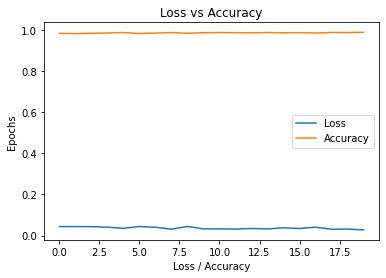

In [23]:
loss20 = [0.0434, 0.0436, 0.0432,  0.0406, 0.0352, 0.0437, 0.0404, 0.0309, 0.0442, 0.0323, 0.0323, 0.0313, 0.0343, 0.0322, 0.0374, 0.0342, 0.0405, 0.0306, 0.0316, 0.0273]
accuracy20 = [0.9834, 0.9822, 0.9839, 0.9850, 0.9876, 0.9824, 0.9848, 0.9875, 0.9835, 0.9867, 0.9875, 0.9870, 0.9860, 0.9876, 0.9863, 0.9871, 0.9850, 0.9879, 0.9874, 0.9889]
epochs = [i for i in range(20)]

plt.plot(epochs, loss20, label = "Loss")
plt.plot(epochs, accuracy20, label = "Accuracy")
plt.xlabel("Loss / Accuracy")
plt.ylabel("Epochs")
plt.title("Loss vs Accuracy")
plt.legend()

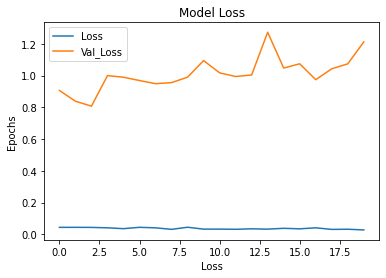

In [24]:
loss20 = [0.0434, 0.0436, 0.0432,  0.0406, 0.0352, 0.0437, 0.0404, 0.0309, 0.0442, 0.0323, 0.0323, 0.0313, 0.0343, 0.0322, 0.0374, 0.0342, 0.0405, 0.0306, 0.0316, 0.0273]
val_loss20 = [0.9063, 0.8385, 0.8074, 1.0000, 0.9898, 0.9689, 0.9490, 0.9557, 0.9900, 1.0949, 1.0172, 0.9943, 1.0040, 1.2733, 1.0475, 1.0745, 0.9743, 1.0429, 1.0742, 1.2123]
epochs = [i for i in range(20)]

plt.plot(epochs, loss20, label = "Loss")
plt.plot(epochs, val_loss20, label = "Val_Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("Model Loss")
plt.legend()

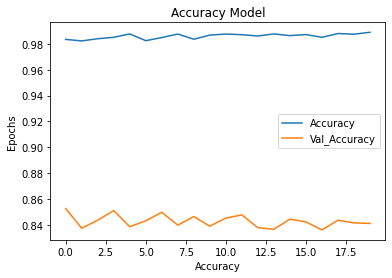

In [22]:
accuracy20 = [0.9834, 0.9822, 0.9839, 0.9850, 0.9876, 0.9824, 0.9848, 0.9875, 0.9835, 0.9867, 0.9875, 0.9870, 0.9860, 0.9876, 0.9863, 0.9871, 0.9850, 0.9879, 0.9874, 0.9889]
val_accuracy20 = [0.8528, 0.8376, 0.8438,  0.8512, 0.8388, 0.8433, 0.8499, 0.8400, 0.8466, 0.8392, 0.8454, 0.8479, 0.8380, 0.8368, 0.8446, 0.8425, 0.8363, 0.8438, 0.8417, 0.8413]
epochs = [i for i in range(20)]

plt.plot(epochs, accuracy20, label = "Accuracy")
plt.plot(epochs, val_accuracy20, label = "Val_Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.title("Accuracy Model")
plt.legend()

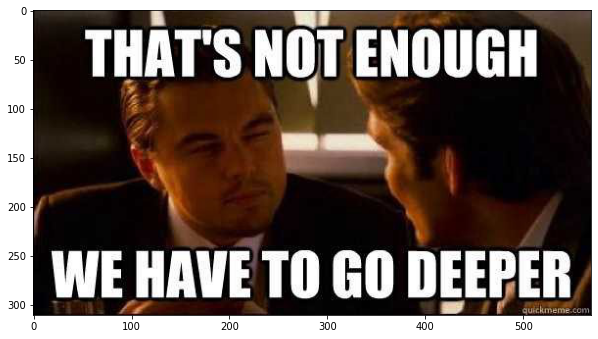

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [26]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [27]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())

# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))

# + ReLu
model.add(Activation('relu'))

# + Dropout
model.add(Dropout(0.5))

# + Dense layer with 1 neuron
model.add(Dense(1))

# + sigmoid
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.
with tensorflow.device('/GPU:0'):
    model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=5,
        validation_data=val_generator,
        validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
312/312 [==============================] - 143s 441ms/step - loss: 0.5004 - accuracy: 0.7481 - val_loss: 0.3520 - val_accuracy: 0.8651
Epoch 2/5
312/312 [==============================] - 129s 413ms/step - loss: 0.3406 - accuracy: 0.8535 - val_loss: 0.2971 - val_accuracy: 0.8877
Epoch 3/5
312/312 [==============================] - 128s 409ms/step - loss: 0.2968 - accuracy: 0.8743 - val_loss: 0.2737 - val_accuracy: 0.8898
Epoch 4/5
312/312 [==============================] - 142s 455ms/step - loss: 0.2734 - accuracy: 0.8865 - val_loss: 0.2597 - val_accuracy: 0.8997
Epoch 5/5
312/312 [==============================] - 136s 434ms/step - loss: 0.2587 - accuracy: 0.8917 - val_loss: 0.2475 - val_accuracy: 0.9034


In [30]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 88.90%


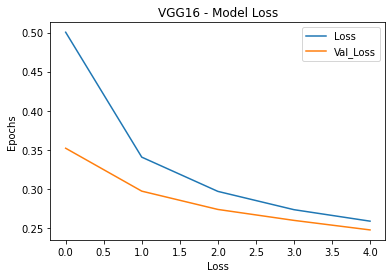

In [31]:
lossvgg = [0.5004, 0.3406, 0.2968,  0.2734, 0.2587]
val_lossvgg = [0.3520, 0.2971, 0.2737, 0.2597, 0.2475]
epochs = [i for i in range(5)]

plt.plot(epochs, lossvgg, label = "Loss")
plt.plot(epochs, val_lossvgg, label = "Val_Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("VGG16 - Model Loss")
plt.legend()

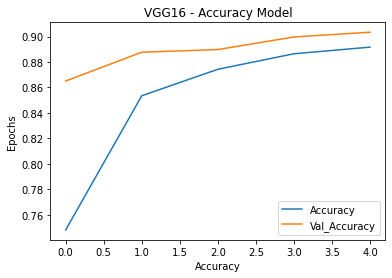

In [32]:
accuracyvgg = [0.7481, 0.8535, 0.8743, 0.8865, 0.8917]
val_accuracyvgg = [0.8651, 0.8877, 0.8898,  0.8997, 0.9034]
epochs = [i for i in range(5)]

plt.plot(epochs, accuracyvgg, label = "Accuracy")
plt.plot(epochs, val_accuracyvgg, label = "Val_Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.title("VGG16 - Accuracy Model")
plt.legend()

# RESNET 50

In [36]:
ResNet50_net = ResNet50(weights='imagenet', 
                  include_top=False,      
                  input_shape=(150, 150, 3))
ResNet50_net.trainable = False             
                                          
ResNet50_net.summary()   

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [37]:
modelres50 = Sequential()
modelres50.add(ResNet50_net) 

modelres50.add(Flatten())
modelres50.add(Dense(256))
modelres50.add(Activation('relu'))
modelres50.add(Dropout(0.5))
modelres50.add(Dense(1))
modelres50.add(Activation('sigmoid'))

modelres50.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_8 (Activation)   (None, 1)                

In [38]:
modelres50.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.
with tensorflow.device('/GPU:0'):
    modelres50.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=5,
        validation_data=val_generator,
        validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/5
312/312 [==============================] - 144s 446ms/step - loss: 0.6892 - accuracy: 0.5687 - val_loss: 0.6518 - val_accuracy: 0.6254
Epoch 2/5
312/312 [==============================] - 127s 406ms/step - loss: 0.6507 - accuracy: 0.6184 - val_loss: 0.6328 - val_accuracy: 0.6587
Epoch 3/5
312/312 [==============================] - 130s 417ms/step - loss: 0.6355 - accuracy: 0.6436 - val_loss: 0.6228 - val_accuracy: 0.6554
Epoch 4/5
312/312 [==============================] - 126s 403ms/step - loss: 0.6233 - accuracy: 0.6548 - val_loss: 0.6328 - val_accuracy: 0.6250
Epoch 5/5
312/312 [==============================] - 129s 413ms/step - loss: 0.6163 - accuracy: 0.6659 - val_loss: 0.6036 - val_accuracy: 0.6846


In [42]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 88.86%


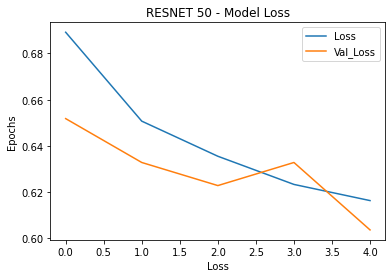

In [40]:
lossres = [0.6892, 0.6507, 0.6355,  0.6233, 0.6163]
val_lossres = [0.6518, 0.6328, 0.6228, 0.6328, 0.6036]
epochs = [i for i in range(5)]

plt.plot(epochs, lossres, label = "Loss")
plt.plot(epochs, val_lossres, label = "Val_Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("RESNET 50 - Model Loss")
plt.legend()

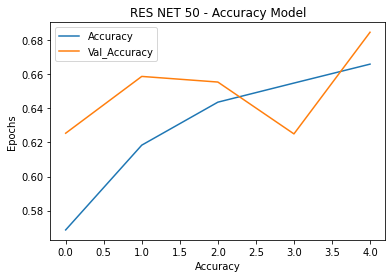

In [41]:
accuracyres = [0.5687, 0.6184, 0.6436, 0.6548, 0.6659]
val_accuracyres = [0.6254, 0.6587, 0.6554, 0.6250, 0.6846]
epochs = [i for i in range(5)]

plt.plot(epochs, accuracyres, label = "Accuracy")
plt.plot(epochs, val_accuracyres, label = "Val_Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.title("RES NET 50 - Accuracy Model")
plt.legend()